In [1]:
import os 
from datetime import datetime
import pandas as pd
import random
import bqplot
import numpy as np
import ipywidgets
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

import bqplot
import ipywidgets
import pandas as pd
import matplotlib.colors as mpl_colors
import datetime as dt

%matplotlib inline

# Part 1. & Part 2. 

## Part 1. Writeup 
### Work from the last time, that is the part 1
This is a part has been mainly focusing on data cleaning, data wrangling and data preprocession.

In [2]:
def json_read(file_path, json_columns):
    df = pd.read_csv(file_path, 
                     converters = {column: json.loads for column in json_columns},
                    dtype={'fullvisitorId':'str'},
                    skiprows = lambda i: i>0 and random.random()>0.07)
    
    for column in json_columns:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f'{column}.{subcolumn}' for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index = True, left_index=True)
    
    print(f"Loaded {os.path.basename(file_path)}. Shape: {df.shape}")
    return df     

In [3]:
json_columns = ['device', 'geoNetwork', 'totals', 'trafficSource']
file_path = '/Users/cy/Documents/Pyfiles/IS590DV/final_project/train_v2.csv'
df_train = json_read(file_path, json_columns)

/Users/cy/Downloads/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Loaded train_v2.csv. Shape: (119203, 59)


In [4]:
#df_train.drop(constant_columns, axis=1, inplace =True)
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119203 entries, 0 to 119202
Data columns (total 59 columns):
channelGrouping                                      119203 non-null object
customDimensions                                     119203 non-null object
date                                                 119203 non-null int64
fullVisitorId                                        119203 non-null object
hits                                                 119203 non-null object
socialEngagementType                                 119203 non-null object
visitId                                              119203 non-null int64
visitNumber                                          119203 non-null int64
visitStartTime                                       119203 non-null int64
device.browser                                       119203 non-null object
device.browserVersion                                119203 non-null object
device.browserSize                                   1192

In [5]:
#check any duplicate of the whole dataset
df_train[df_train.duplicated()]

,channelGrouping,customDimensions,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,...,trafficSource.keyword,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.isTrueDirect,trafficSource.adContent


In [6]:
#fill the missing values and tranform the data types
def transform_na(df, column, dtype, filling_val):
    if dtype==int:
        df[column]=df[column].fillna(filling_val).astype(int)
    elif dtype==float:
        df[column]=df[column].fillna(filling_val).astype(float)
    else:
        df[column].fillna(filling_val, inplace=True)

In [7]:
transform_na(df_train,'totals.transactionRevenue',float,0.0)
transform_na(df_train,'totals.pageviews',int,1)
transform_na(df_train,'totals.bounces',int,0)
transform_na(df_train,'trafficSource.isTrueDirect',bool,False)
transform_na(df_train,'trafficSource.adwordsClickInfo.isVideoAd',bool,True)
df_train.loc[df_train['geoNetwork.city'] == "(not set)", 'geoNetwork.city'] = 'NaN'
#df['totals.transactionRevenue'].fillna(filling_val, inplace=True).astype(float)

In [8]:
#transform the date time formats
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y%m%d')
df_train['visitHour'] = (df_train['visitStartTime'].apply(lambda x: str(datetime.fromtimestamp(x).hour))).astype(int)

In [9]:
#find the constant variables
constant_columns = []
for col in df_train.columns:
    if len(df_train[col].unique()) == 1:
        constant_columns.append(col)

constant_columns

['socialEngagementType',
 'device.browserVersion',
 'device.browserSize',
 'device.operatingSystemVersion',
 'device.mobileDeviceBranding',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.flashVersion',
 'device.language',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'trafficSource.adwordsClickInfo.criteriaParameters']

In [10]:
df_train.drop(constant_columns, axis=1, inplace=True)

In [11]:
#df_train.drop(constant_columns, axis=1, inplace =True)
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119203 entries, 0 to 119202
Data columns (total 41 columns):
channelGrouping                                 119203 non-null object
customDimensions                                119203 non-null object
date                                            119203 non-null datetime64[ns]
fullVisitorId                                   119203 non-null object
hits                                            119203 non-null object
visitId                                         119203 non-null int64
visitNumber                                     119203 non-null int64
visitStartTime                                  119203 non-null int64
device.browser                                  119203 non-null object
device.operatingSystem                          119203 non-null object
device.isMobile                                 119203 non-null bool
device.deviceCategory                           119203 non-null object
geoNetwork.continent              

In [12]:
#check any duplicate of the whole dataset again
df_train[df_train.duplicated()]

,channelGrouping,customDimensions,date,fullVisitorId,hits,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,...,trafficSource.keyword,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.isTrueDirect,trafficSource.adContent,visitHour


In [13]:
#explore the relationship between transactions and fullVisitorId
df_revenue = df_train[df_train['totals.transactionRevenue']>0]
df_revenue[df_revenue.duplicated(['fullVisitorId'])][['totals.transactionRevenue']]

,totals.transactionRevenue
13208,5.319000e+07
16256,9.201600e+08
22117,7.190000e+06
26305,2.886900e+08
31817,5.822600e+08
64903,3.098000e+07
66796,5.599000e+07
81521,7.676000e+07
106385,2.332560e+09
111938,1.459900e+08


In [14]:
#validate the 80-20 assumption
df_user = df_train.groupby(['fullVisitorId'])['totals.transactionRevenue'].sum().reset_index()
df_user.loc[df_train['totals.transactionRevenue']>0, 'payment_success']='Payment Success'
df_user.loc[df_train['totals.transactionRevenue']==0, 'payment_success']='No Payment'

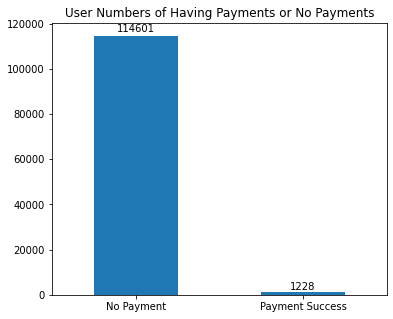

In [15]:
ax=df_user['payment_success'].value_counts().plot(kind='bar', figsize=(6,5), title='User Numbers of Having Payments or No Payments')
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2, 1.01*height,
            '%d' % int(height), ha='center', va='bottom')
    plt.xticks(rotation=0)
plt.show()

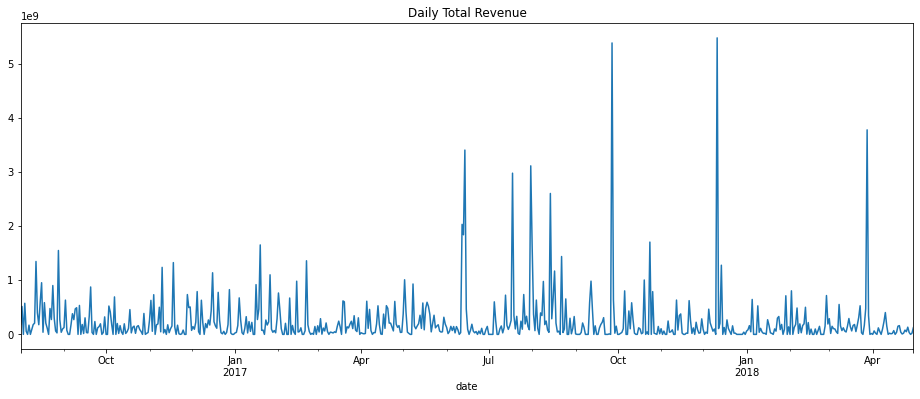

In [16]:
df_train.groupby(['date'])['totals.transactionRevenue'].sum().plot(figsize=(16,6), title = 'Daily Total Revenue')

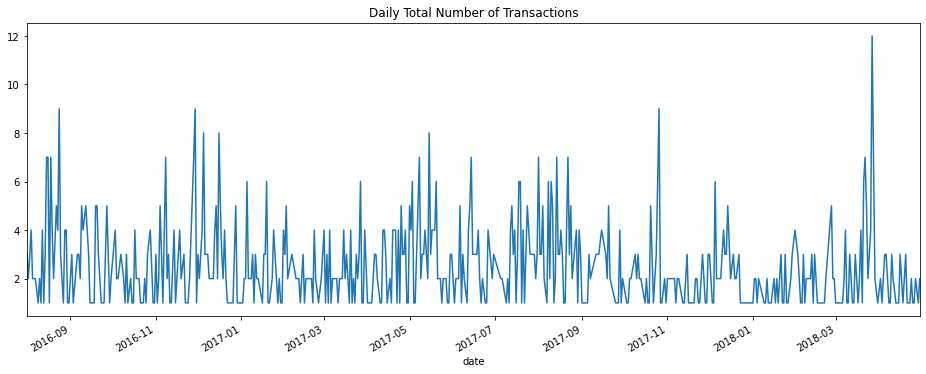

In [17]:
df_train[df_train['totals.transactionRevenue']>0].groupby(['date'])['totals.transactionRevenue'].count().plot(figsize=(16,6),title = 'Daily Total Number of Transactions')

# Part 2. Writeup
### Design of the interactive  and How it works

This is a quite larger dataset and the transaction revenue is the variable of most interest and overall target goal. SYt is important to visualize how the other factors affect the transaction revenue over time.

The first dashboard called "Global Transaction" helped us to see the transaction amount over time in a geographical world map. By moving the mouse cursor in the map, it would automatically show a dynamic pop-up window, which give the line plot of the daily transaction revenue of the country over time when the cursor is hovering on a given country. If there are non-records, or only non-payment records, that is non transaction revenue at all, or number of records less than 10, the pop-up window will be empty while with a statement saying "No enough data or No data available at all" in the country.

The second dashboard gives the information of the trends of transaction revenue over different time levels ('day', 'week', 'month') and grouped by different categorical factors, that is ('channelGrouping', 'device.isMobile','trafficSource.isTrueDirect', 'device.deviceCategory', 'geoNetwork.continent'). Especially, in additional to the existing varaibles in the data, 'None' is also an option for users to check the overall revenue trends over different time levels. So there are two scolled-down list from ipywidget interact, which allows the user to choose the time levels for x axis and grouped-by variables. The y-axis is always indicating the transaction revenue in dollars. 


In [19]:
from ipywidgets import Label, VBox, Layout
from bqplot.market_map import MarketMap
from bqplot import (ColorScale, ColorAxis, DateScale, 
                    LinearScale, Axis, Lines, Figure)


In [34]:
df_train_daily = df_train.groupby(['geoNetwork.country','date'])['totals.transactionRevenue'].sum().reset_index()
df_train_daily['date'].nunique()

638

## First Dashboard

In [39]:
## Create Line Plot Elements for the dynamic pop-up for the country where the cursor land
sc_x = DateScale()
sc_y = LinearScale()

ax_x = Axis(scale=sc_x, grid_lines='dashed', label='Date')
ax_y = Axis(scale=sc_y, orientation='vertical', grid_lines='dashed',
            label='Transaction Revenue', label_location='end', label_offset='-1em')

# line = Lines(x= np.array(sorted(df_train_daily['date'].unique())), 
#              y=[], scales={'x': sc_x, 'y': sc_y}, colors=['orange'])
line = Lines(x=[], 
             y=[], scales={'x': sc_x, 'y': sc_y}, colors=['orange'])
line.layout = Layout(width='200px', height='150px')
fig_tooltip = Figure(marks=[line], axes=[ax_x, ax_y])
fig_tooltip.layout = Layout(width='500px', height='450px')

In [49]:
#define the map and how it displays with the df_train as the input data. 
# scales
sc_geo = bqplot.Mercator() # a projection from the globe (sphere) onto a plane 
# "axis"
shape_data = bqplot.topo_load('map_data/WorldMap.json')

# marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo},tooltip=fig_tooltip)


map_mark = bqplot.Map(scales={'projection': bqplot.Mercator()}, tooltip=fig_tooltip)
map_mark.interactions = {'click': 'select', 'hover': 'tooltip'}
map_mark.layout = Layout(min_width='800px', min_height='800px')
#fig =bqplot.Figure(marks=[map_mark], title='Interactions Example')

# Update the tooltip chart
hovered_symbol = {}
def hover_handler(self, content):
    global hovered_symbol
    symbol = content.get('data', '')
#     print('symbol' ,symbol)
#     print('hovered_symbol',hovered_symbol)
    
    if(symbol != hovered_symbol):
        hovered_symbol = symbol
        #print(hovered_symbol['name'])
        #print(df_train_daily[df_train_daily['geoNetwork.country']==hovered_symbol['name']])
#         sub_country = df_train_daily[df_train_daily['date']>= from_date  & df_train_daily['date']<= end_date]
        sub_country = df_train_daily[df_train_daily['geoNetwork.country']==hovered_symbol['name']]
        if sub_country['totals.transactionRevenue'].nunique() > 1 and len(sub_country)>20:
            with line.hold_sync():
                line.x = sub_country['date'].values
                line.y = sub_country['totals.transactionRevenue'].values
                line.scales['y'].min = line.y.min().item()
                line.scales['y'].max = line.y.max().item()
                print(hovered_symbol['name'])
                print('Total Days with transactions:' , len(line.x))
                print('Min Trasaction Revenue:', line.y.min().item())
                print('Max Trasaction Revenue:', line.y.max().item())
 

            fig_tooltip.title = hovered_symbol['name']
        else:
            with line.hold_sync():
                line.x = []
                line.y = []
                fig_tooltip.title = 'No enough data for '+hovered_symbol['name']

map_mark.on_hover(hover_handler)
fig=bqplot.Figure(marks=[map_mark], title='Global Transactions')
fig

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, marks=[Map(hovered_styles={'hovered_fill…

Canada
Total Days with transactions: 633
Min Trasaction Revenue: 0.0
Max Trasaction Revenue: 1796000000.0
Brazil
Total Days with transactions: 591
Min Trasaction Revenue: 0.0
Max Trasaction Revenue: 49980000.0
United States
Total Days with transactions: 638
Min Trasaction Revenue: 0.0
Max Trasaction Revenue: 5390440000.0
Saudi Arabia
Total Days with transactions: 275
Min Trasaction Revenue: 0.0
Max Trasaction Revenue: 60970000.0
India
Total Days with transactions: 638
Min Trasaction Revenue: 0.0
Max Trasaction Revenue: 23430000.0
United States
Total Days with transactions: 638
Min Trasaction Revenue: 0.0
Max Trasaction Revenue: 5390440000.0
Canada
Total Days with transactions: 633
Min Trasaction Revenue: 0.0
Max Trasaction Revenue: 1796000000.0


## Secod Dashboard

In [38]:
agg_vars=['day','week','month']
group_vars=['channelGrouping', 'device.isMobile','trafficSource.isTrueDirect', 
            'device.deviceCategory', 'geoNetwork.continent', 'None']

@ipywidgets.interact(aggregation_level=agg_vars,group_by=group_vars)
def plot_timeseries_revenue(aggregation_level, group_by):
    fig_size = (14, 8)
    fig, ax = plt.subplots(figsize=fig_size)
    plt.title(aggregation_level +' Trasaction Revenue', fontsize=18)
    plt.ylabel('Transaction Revenue in Dollars ($)', fontsize=14)
    
    if aggregation_level in ['week', 'month']:
        if aggregation_level=='week':
            #df_train['week'] = df_train['date'] - df_train['date'].dt.dayofweek*timedelta(days=1)
            df_train['week'] = df_train['date'].values.astype('datetime64[W]')
        elif aggregation_level=='month':
            #df_train['month'] = df_train['date'].dt.year*100 + df_train['date'].dt.month
            df_train['month'] = df_train['date'].values.astype('datetime64[M]')
    else:
        #df_train['day'] = df_train['date'].dt.year*10000 + df_train['date'].dt.month*100+df_train['date'].dt.day
        df_train['day']= df_train['date'].dt.date
  
    if group_by == 'None':        
        df_train.groupby([aggregation_level]).sum()['totals.transactionRevenue'].plot(ax=ax)
    else:
        df_train.groupby([aggregation_level, group_by]).sum()['totals.transactionRevenue'].unstack().plot(ax=ax)

interactive(children=(Dropdown(description='aggregation_level', options=('day', 'week', 'month'), value='day')…